# BINARY CLASSIFIER USING ANN: _CHURN MODELLING_
---

```julia
versioninfo() # -> v"1.11.1"
```

In [1]:
cd(@__DIR__)

In [2]:
import Pkg; Pkg.activate("..")

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-1`


Import the required librairies

In [3]:
using CSV, DataFrames
using MLJ
using Flux

Hyperparameters tuning

In [4]:
η, epochs, batchsize = .001, 1_00, 64

(0.001, 100, 64)

Load data for csv file

In [5]:
df = CSV.read("../../Datasets/Churn_Modelling.csv", DataFrame)

Row,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
,Int64,Int64,String31,Int64,String7,String7,Int64,Int64,Float64,Int64,Int64,Int64,Float64,Int64
1,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,1.01349e5,1
2,2,15647311,Hill,608,Spain,Female,41,1,83807.9,1,0,1,1.12543e5,0
3,3,15619304,Onio,502,France,Female,42,8,1.59661e5,3,1,0,1.13932e5,1
4,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.6,0
5,5,15737888,Mitchell,850,Spain,Female,43,2,1.25511e5,1,1,1,79084.1,0
6,6,15574012,Chu,645,Spain,Male,44,8,1.13756e5,2,1,0,1.49757e5,1
7,7,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.8,0
8,8,15656148,Obinna,376,Germany,Female,29,4,1.15047e5,4,1,0,1.19347e5,1
9,9,15792365,He,501,France,Male,44,4,1.42051e5,2,0,1,74940.5,0


Choose the target vector `y`

In [6]:
ydf = select(df, :Exited)
#coerce!(ydf, :Exited => Multiclass)
y = ydf.Exited
first(y, 5)

5-element Vector{Int64}:
 1
 0
 1
 0
 0

Specify the features matrix `X`

In [7]:
Xdf = select(df, Not([:RowNumber, :CustomerId, :Surname, :Exited]))
coerce!(Xdf,
    :Geography => Multiclass,
    :Gender => Multiclass
)

Row,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
,Int64,Cat…,Cat…,Int64,Int64,Float64,Int64,Int64,Int64,Float64
1,619,France,Female,42,2,0.0,1,1,1,1.01349e5
2,608,Spain,Female,41,1,83807.9,1,0,1,1.12543e5
3,502,France,Female,42,8,1.59661e5,3,1,0,1.13932e5
4,699,France,Female,39,1,0.0,2,0,0,93826.6
5,850,Spain,Female,43,2,1.25511e5,1,1,1,79084.1
6,645,Spain,Male,44,8,1.13756e5,2,1,0,1.49757e5
7,822,France,Male,50,7,0.0,2,1,1,10062.8
8,376,Germany,Female,29,4,1.15047e5,4,1,0,1.19347e5
9,501,France,Male,44,4,1.42051e5,2,0,1,74940.5


Onehotencoding of multiclass variables

In [8]:
ce = ContinuousEncoder(drop_last=true)
Xdf = machine(ce, Xdf) |> fit! |> MLJ.transform

[ Info: Training machine(ContinuousEncoder(drop_last = true, …), …).


Row,CreditScore,Geography__France,Geography__Germany,Gender__Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,619.0,1.0,0.0,1.0,42.0,2.0,0.0,1.0,1.0,1.0,1.01349e5
2,608.0,0.0,0.0,1.0,41.0,1.0,83807.9,1.0,0.0,1.0,1.12543e5
3,502.0,1.0,0.0,1.0,42.0,8.0,1.59661e5,3.0,1.0,0.0,1.13932e5
4,699.0,1.0,0.0,1.0,39.0,1.0,0.0,2.0,0.0,0.0,93826.6
5,850.0,0.0,0.0,1.0,43.0,2.0,1.25511e5,1.0,1.0,1.0,79084.1
6,645.0,0.0,0.0,0.0,44.0,8.0,1.13756e5,2.0,1.0,0.0,1.49757e5
7,822.0,1.0,0.0,0.0,50.0,7.0,0.0,2.0,1.0,1.0,10062.8
8,376.0,0.0,1.0,1.0,29.0,4.0,1.15047e5,4.0,1.0,0.0,1.19347e5
9,501.0,1.0,0.0,0.0,44.0,4.0,1.42051e5,2.0,0.0,1.0,74940.5


Features scaling

In [9]:
sc = Standardizer()
Xdf = machine(sc, Xdf) |> fit! |> MLJ.transform

[ Info: Training machine(Standardizer(features = Symbol[], …), …).


Row,CreditScore,Geography__France,Geography__Germany,Gender__Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.326205,0.997154,-0.578707,1.09593,0.293503,-1.04171,-1.22579,-0.911538,0.646059,0.970194,0.0218854
2,-0.440014,-1.00275,-0.578707,1.09593,0.198154,-1.38747,0.117344,-0.911538,-1.54769,0.970194,0.216523
3,-1.53672,0.997154,-0.578707,1.09593,0.293503,1.03286,1.33299,2.52693,0.646059,-1.03062,0.240675
4,0.501496,0.997154,-0.578707,1.09593,0.00745628,-1.38747,-1.22579,0.807696,-1.54769,-1.03062,-0.108912
5,2.06378,-1.00275,-0.578707,1.09593,0.388852,-1.04171,0.785689,-0.911538,0.646059,0.970194,-0.365258
6,-0.0572024,-1.00275,-0.578707,-0.912374,0.4842,1.03286,0.597299,0.807696,0.646059,-1.03062,0.863607
7,1.77409,0.997154,-0.578707,-0.912374,1.05629,0.687096,-1.22579,0.807696,0.646059,0.970194,-1.56541
8,-2.84035,-1.00275,1.72782,1.09593,-0.946032,-0.350186,0.617988,4.24616,0.646059,-1.03062,0.334837
9,-1.54706,0.997154,-0.578707,-0.912374,0.4842,-0.350186,1.05077,0.807696,-1.54769,0.970194,-0.437307


Extract only the values for `X`, i.e, rm the headers.

In [10]:
n, m = size(Xdf)
X = Array{Float32, 2}(undef, (n, m));
for i in 1:m
    X[:, i] = Xdf[!, i];
end

Design the architecture of the classifier, denoted hereafter by `clf`

In [11]:
clf = Chain(
            Dense( 11 => 8, relu ),
            Dense(  8 => 8, relu ),
            Dense(  8 => 8, relu ),
            Dense(  8 => 1 )
            )

Chain(
  Dense(11 => 8, relu),                 # 96 parameters
  Dense(8 => 8, relu),                  # 72 parameters
  Dense(8 => 8, relu),                  # 72 parameters
  Dense(8 => 1),                        # 9 parameters
)                   # Total: 8 arrays, 249 parameters, 1.379 KiB.

Permute dims: ROW => features and COL => observation

In [12]:
X = X'; # permutedims(X)
y = y'; # permutedims(y)

Optimizers and data loader

In [13]:
opt = Flux.Adam(η);
state = Flux.setup(opt, clf);
loader = Flux.DataLoader((X, y); batchsize=batchsize, shuffle=true);
vec_loss = []

Any[]

**Training phase**

In [14]:
using ProgressMeter

In [15]:
@showprogress for _ in 1:epochs
    for (X, y) in loader
        loss, grads = Flux.withgradient(clf) do mdl
            ŷ_ = mdl(X);
            Flux.Losses.logitbinarycrossentropy(ŷ_, y);
        end
        Flux.update!(state, clf, grads[1]); # Upd `W` and `b`
        push!(vec_loss, loss); # Log `loss` to the vector `vec_loss`
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:29


Plot the loss vector `vec_loss`

In [16]:
using Plots

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (8))


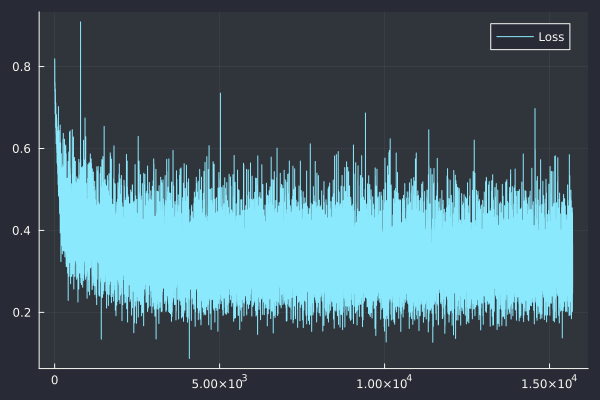

In [17]:
plot(vec_loss, label="Loss")

In [18]:
extrema(vec_loss)

(0.08749401f0, 0.9090954f0)

Some metrics

In [19]:
ŷ = clf(X) |> σ;
ŷ = (ŷ .≥ .5);

Basic way to compute the accuracy

In [20]:
accuracy = mean( ŷ .== y )

0.8656

Confusion Matrix

In [21]:
displayed_cm = MLJ.ConfusionMatrix(levels=[1, 0])(ŷ, y)
cm = ConfusionMatrices.matrix(displayed_cm)

2×2 Matrix{Int64}:
  986   293
 1051  7670

Other metrics

In [22]:
TP, TN, FP, FN = cm[2, 2], cm[1, 1], cm[2, 1], cm[1, 2];

`Accuracy` denotes the ratio of how much we got right over all cases:
$$ \text{Accuracy} \;=\; \dfrac{\text{TP}+\text{TN}}{\text{TP}+\text{FP}+\text{TN}+\text{FN}} $$

In [23]:
accuracy_ = (TP+TN)/(TP+TN+FP+FN) # MLJ.accuracy(cm)

0.8656

`Precision` designates how much positives do we get right over all positive predictions:
$$ \text{Precision} \;=\; \dfrac{\text{TP}}{\text{TP}+\text{FP}} $$

In [24]:
precision_ = TP/(TP+FP) # MLJ.precision(cm)

0.8794862974429538

`Recall` is the ratio of how much positives we got
right over all actual positive cases:
$$ \text{Recall} \;=\; \dfrac{\text{TP}}{\text{TP}+\text{FN}} $$

In [25]:
recall_ = TP/(TP+FN) # MLJ.recall(cm)

0.9632048223031521

`f1-score` denotes the <u>Harmonic Mean</u> of `Precision` & `Recall`:
$$ \text{f1-score} \;=\; \dfrac{2}{\dfrac{1}{\text{Precision}}+\dfrac{1}{\text{Recall}}} $$

In [26]:
f1score_ = 2/(1/precision_ + 1/recall_) # MLJ.f1score(cm)

0.9194437784703907